# Etapa1: 1. Crear un documento en Google Colab y cargar los sets de datos como DataFrames

## Importar las librerías

In [1]:
import pandas as pd # Manejo y análisis de estructuras de datos
import os # Permite interactuar con el sistema operativo
import numpy as np # permite cálculos matemáticos
import matplotlib.pyplot as plt # Visualización básica de gráficos
import seaborn as sns # Visualizacion de datos

## Definición de las funciones que se van a utilizar

In [2]:
# ============================================
#   FUNCION PARA MOSTRAR INFORMACIÓN DEL DF
# ============================================
def show_info(df, name):
  print(f"=== {name} ===")
  print("shape:", df.shape)
  print("columnas:", list(df.columns))
  print("tipos de datos:")
  print(df.dtypes)
  print("\nNulos por columna:")
  print(df.isna().sum())
  print("\nPrimeras filas:")
  print(df.head(5))
  print("\nDescripción (numérico):")
  print(df.describe(include='number'))
  print("-"*100)
# ============================================
#   FUNCION DE CONTROL DE CALIDAD DE DATOS
# ============================================
# Esta función analiza un DF y muestra total de filas completamente duplicadas y repetidos por columna clave
def show_quality(df, name, key=None):
  print(f"### {name}")
  dup_rows = df.duplicated(keep=False).sum()
  print("Filas duplicadas (exactas):", dup_rows)
  if key and key in df.columns:
    dup_key = df[key].duplicated(keep=False).sum()
    print(f"Duplicadas por clave '{key}':", dup_key)
    if dup_key > 0:
      dup_sorted = (
          df[df[key].duplicated(keep=False)][key]
          .value_counts()
          .sort_values(ascending=False)
      )
      print("\n Valores más repetidos:")
      display(dup_sorted.head(10))
    else:
      print(f"No se encontraron duplicados en la clave '{key}'.")
  else:
    if key:
        print(f"La clave '{key}' no existe en el DF")
    else:
        print("No se indicó una clave para analizar duplicados por columna.")

# ============================================
#   FUNCION PARA NORMALIZAR EL TEXTO
# ============================================
# Esta función normaliza los datos en las columnas de tipo "object", quitando espacios, tabulaciones,
# saltos de línea, pasando a titulo (la primera letra en mayúsculas) y convirtiendo a tipo string
def normalize_text(df):
    for col in df.select_dtypes(include="object").columns:
        print(col)
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            .str.strip()                               # Elimina espacios al inicio y final
            .str.replace(r"[\u200b\t\r\n]", "", regex=True) # Utiliza una expresión regular
            .str.replace(" +", " ", regex=True)
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
    return df
# ============================================
#   FUNCION PARA NORMALIZAR FECHA
# ============================================
# Esta función convierte a formato datetime las fechas del dataframe que recibe como parámetro
# se identifica si el nombre de la columna contiene la palabra "fecha"
def normalize_date(df):
 for col in df.columns:
  if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
    df[col] = pd.to_datetime(
    df[col],
    errors="coerce",
    dayfirst=True)
 return df

# ====================================================
#   FUNCION PARA NORMALIZAR VALORES NUMERICOS: precio
# ====================================================
# Esta función se utiliza para convertir columnas que identifican campos
# numéricos a ese tipo de datos. Para este proyecto solo hay que convertir
# la columna "precio"
def normalize_num(df):
  for col in df.columns:
    if "precio" in col.lower():
      print(col)
      df[col] = (
          df[col]
          .astype(str)
          .str.replace("$", "", regex=False)
          .str.replace(",", "", regex=False)
          .str.strip()
      )
      df[col] = pd.to_numeric(df[col], errors="coerce")
  return df

# ========================================================================
# FUNCION PARA ENCONTRAR LA COLUMNA QUE TIENE EL NOMBRE DEL PRODUCTO
# ========================================================================
# Esta función recibe dos parámetros: un df y una lista de posibles denominaciones
# de columnas para buscar si aparece en el df
def find_col(df, candidatos):
    for c in df.columns:
        nombre = c.lower()
        if any(p in nombre for p in candidatos):
            return c
    return None

# ========================================================================
# Función de ayuda: ¿hay duplicados en la(s) clave(s)?
# ========================================================================
def if_duplicated(df, cols):
  # cols puede tener 1 o más columnas (clave compuesta)
  return df.duplicated(subset=cols, keep=False).any()

# ========================================================================
# CONFIGURACION DEL FORMATO DE VISUALIZACIÓN DE NROS DECIMALES
# ========================================================================
pd.options.display.float_format = '{:,.2f}'.format

## Montar la unidad

In [3]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Etapa 1: 4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames

In [4]:
# listar contenido de la carpeta
os.listdir('/content/drive/MyDrive/datasets')

['clientes.csv',
 'ventas.csv',
 'marketing.csv',
 'resumen_prod_camp.csv',
 'clientes_clean.csv',
 'ventas_clean.csv',
 'marketing_clean.csv']

In [5]:
# leer los csv en dataframes
df_clientes = pd.read_csv('/content/drive/MyDrive/datasets/clientes.csv')
df_ventas = pd.read_csv('/content/drive/MyDrive/datasets/ventas.csv')
df_marketings = pd.read_csv('/content/drive/MyDrive/datasets/marketing.csv')



In [6]:
# Validamos dataframe clientes
show_info(df_clientes, 'clientes (original)')

=== clientes (original) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
tipos de datos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata 42,294.68
1           2  Kristina Scaplehorn    25        Posadas 24,735.04
2           3       Filip Castagne    50    Resistencia 35,744.85
3           4          Liuka Luard    39   Bahía Blanca 27,647.96
4           5        Dore Cockshtt    28        Rosario 28,245.65

Descripción (numérico):
       id_cliente   edad  ingresos
count      567.00 567.00    567.00
mean       284.00  37.94 34,668.74
std        163.82  10.20 12,974.53
min          1.00  20.00    170.29
25%        142.50  30.00 

In [7]:
# Validar dataframe ventas
show_info(df_ventas, 'ventas (original)')

=== ventas (original) ===
shape: (3035, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
tipos de datos:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94      5.00  02/01/2024   
1       811    Lámpara de mesa  $105.10      5.00  02/01/2024   
2      1156           Secadora   $97.96      3.00  02/01/2024   
3      1372           Heladera  $114.35      8.00  02/01/2024   
4      1546           Secadora  $106.21      4.00  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  

Descripción (numérico)

In [8]:
# Validar dataframe marketing
show_info(df_marketings, 'marketing (original)')


=== marketing (original) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
tipos de datos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:
   id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024

Descripción (numérico):
       id_campanha  costo
count        90.00  90.00
mean         45.50   4.93
std       

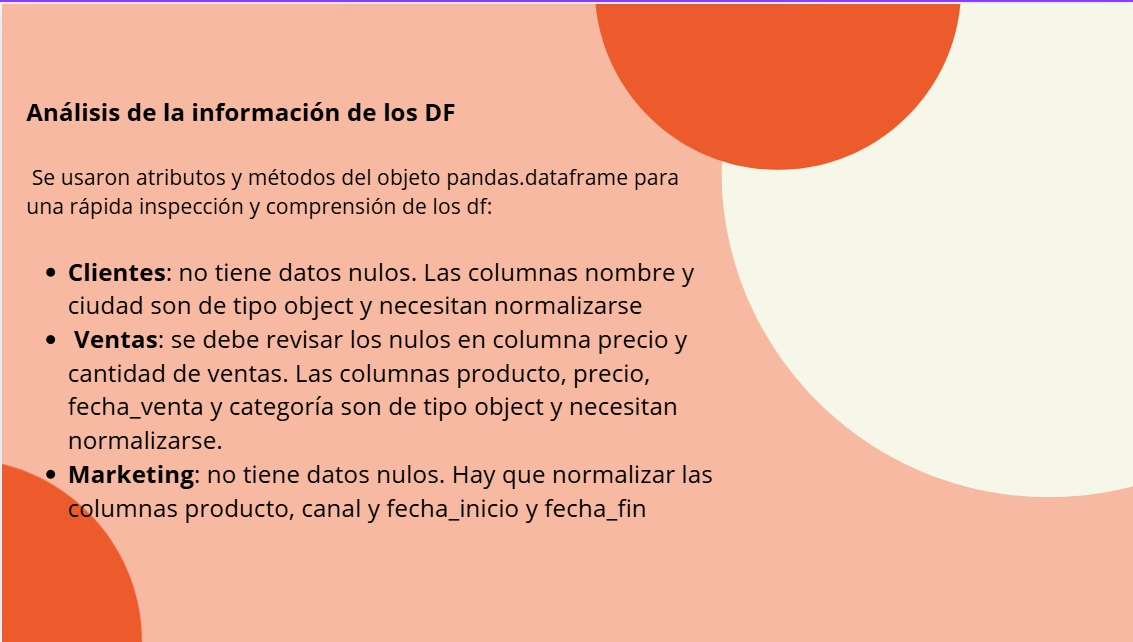

# ETAPA 1: 5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [9]:
# Verificar la calidad de datos en clientes (nulos y duplicados)
show_quality(df_clientes, "CLIENTES" , key="id_cliente")

### CLIENTES
Filas duplicadas (exactas): 0
Duplicadas por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


In [10]:
# Verificar la calidad de datos en ventas (nulos y duplicados)
show_quality(df_ventas, "VENTAS" , key="id_venta")

### VENTAS
Filas duplicadas (exactas): 70
Duplicadas por clave 'id_venta': 70

 Valores más repetidos:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


In [11]:
# Verificar la calidad de datos en marketings (nulos y duplicados)
show_quality(df_marketings, "MARKETINGS" , key="id_campanha")

### MARKETINGS
Filas duplicadas (exactas): 0
Duplicadas por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


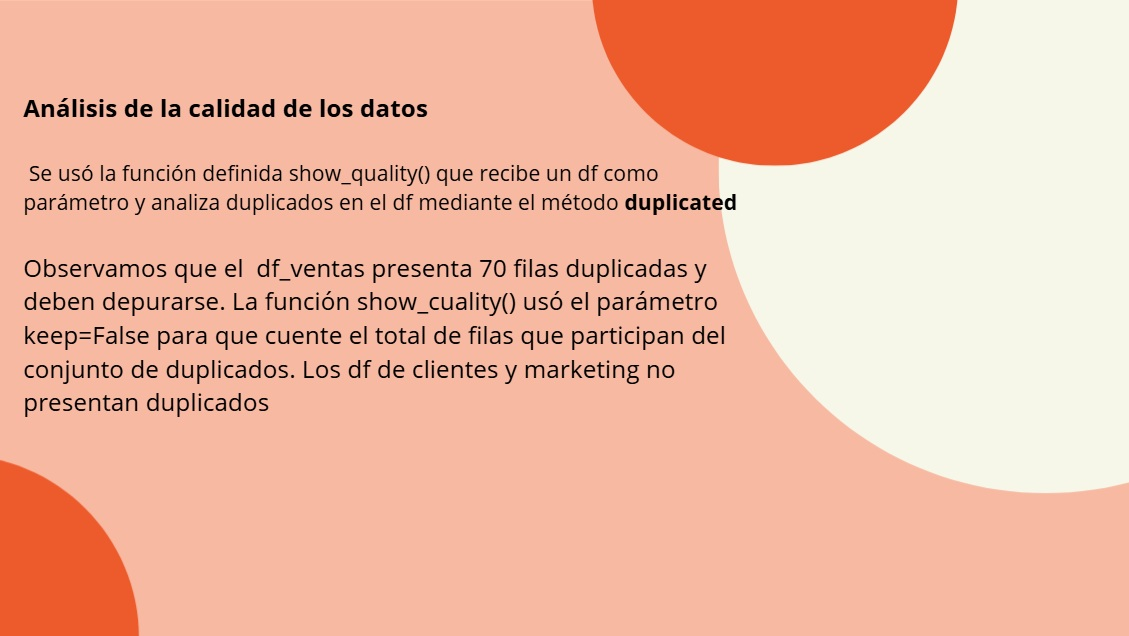

#ETAPA 2: 1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.




In [12]:
# Crear una copia de los DF
df_ventas_clean = df_ventas.copy()
df_clientes_clean = df_clientes.copy()
df_marketings_clean = df_marketings.copy()

In [13]:
# Eliminar los duplicados
df_ventas_clean = df_ventas_clean.drop_duplicates()

In [14]:
# Normalizar fechas en ventas
df_ventas_clean = normalize_date(df_ventas_clean)

In [15]:
# Normalizar fechas en marketings
df_marketings_clean = normalize_date(df_marketings_clean)

In [16]:
# Normalizar texto en clientes
df_clientes_clean = normalize_text(df_clientes_clean)

nombre
ciudad


In [17]:
# Normalizar texto en ventas
df_ventas_clean = normalize_text(df_ventas_clean)

producto
precio
categoria


In [18]:
# Normalizar texto en marketings
df_marketings_clean = normalize_text(df_marketings_clean)

producto
canal


In [19]:
# Normalizar precio en ventas
df_ventas_clean = normalize_num(df_ventas_clean)

precio


Verificar los dataframes luego del proceso de depuración

In [20]:
#Verificar clientes
show_info(df_clientes_clean, 'clientes (clean)')

=== clientes (clean) ===
shape: (567, 5)
columnas: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
tipos de datos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Primeras filas:
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar Del Plata 42,294.68
1           2  Kristina Scaplehorn    25        Posadas 24,735.04
2           3       Filip Castagne    50    Resistencia 35,744.85
3           4          Liuka Luard    39   Bahía Blanca 27,647.96
4           5        Dore Cockshtt    28        Rosario 28,245.65

Descripción (numérico):
       id_cliente   edad  ingresos
count      567.00 567.00    567.00
mean       284.00  37.94 34,668.74
std        163.82  10.20 12,974.53
min          1.00  20.00    170.29
25%        142.50  30.00 26,

In [21]:
#Verificar ventas
show_info(df_ventas_clean, 'ventas (clean)')

=== ventas (clean) ===
shape: (3000, 6)
columnas: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
tipos de datos:
id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Primeras filas:
   id_venta           producto  precio  cantidad fecha_venta  \
0       792  Cuadro Decorativo   69.94      5.00  2024-01-02   
1       811    Lámpara De Mesa  105.10      5.00  2024-01-02   
2      1156           Secadora   97.96      3.00  2024-01-02   
3      1372           Heladera  114.35      8.00  2024-01-02   
4      1546           Secadora  106.21      4.00  2024-01-02   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodom

In [22]:
# Verificar marketings
show_info(df_marketings_clean, 'marketings (clean)')

=== marketings (clean) ===
shape: (90, 6)
columnas: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
tipos de datos:
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Primeras filas:
   id_campanha         producto  canal  costo fecha_inicio  fecha_fin
0           74  Adorno De Pared     Tv   4.81   2024-03-20 2024-05-03
1           12           Tablet   Rrss   3.40   2024-03-26 2024-05-13
2           32  Lámpara De Mesa  Email   5.54   2024-03-28 2024-04-20
3           21       Smartphone   Rrss   6.37   2024-03-29 2024-05-16
4           58         Alfombra  Email   4.25   2024-03-31 2024-05-05

Descripción (numérico):
       id_campanha  costo
count        90.00  90.00
me

In [23]:
# Verificar si se eliminaron duplicados en ventas
show_quality(df_ventas_clean, "VENTAS (clean)" , key="id_venta")

### VENTAS (clean)
Filas duplicadas (exactas): 0
Duplicadas por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.


In [24]:
# -------------------------------------------------
# Guardar los DataFrames limpios como CSV
# -------------------------------------------------
df_ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean.csv", index=False)
df_clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean.csv", index=False)
df_marketings_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean.csv", index=False)

print("✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv")

✅ Archivos guardados: ventas_clean.csv, clientes_clean.csv, marketing_clean.csv


#ETAPA 2: 2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [25]:
# Detectar la columna de producto usando la función "find_col"
prod_col = find_col(df_ventas_clean, ["nombre","producto", "item", "sku", "articul", "artícul", "descrip"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")
print(prod_col)

producto


In [26]:
# Generar una nueva columna "ingreso" = precio * cantidad
df_ventas_perf = (
    df_ventas_clean
    .assign(
        ingreso = df_ventas_clean["precio"] * df_ventas_clean["cantidad"]
    )
)

In [27]:
# Agregar métricas por producto: se agrupa por la columna producto (prod_col detectada más arriba con la función find_col) y se aplican funciones de resumen a las columnas:
# suma de ingreso, suma de cantidad, promedio del precio y cantidad de registros, ordenados por ingreso_total
resumen_prod = (
    df_ventas_perf
    .groupby(
        by=prod_col,
        dropna=False,
        as_index=False,
        observed=False
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        precio_promedio= ('precio', 'mean'),
        registros=('ingreso', 'size')
    )
    .sort_values(
        by='ingreso_total',
        ascending=False,
        na_position='last',
        ignore_index=True
    )
)

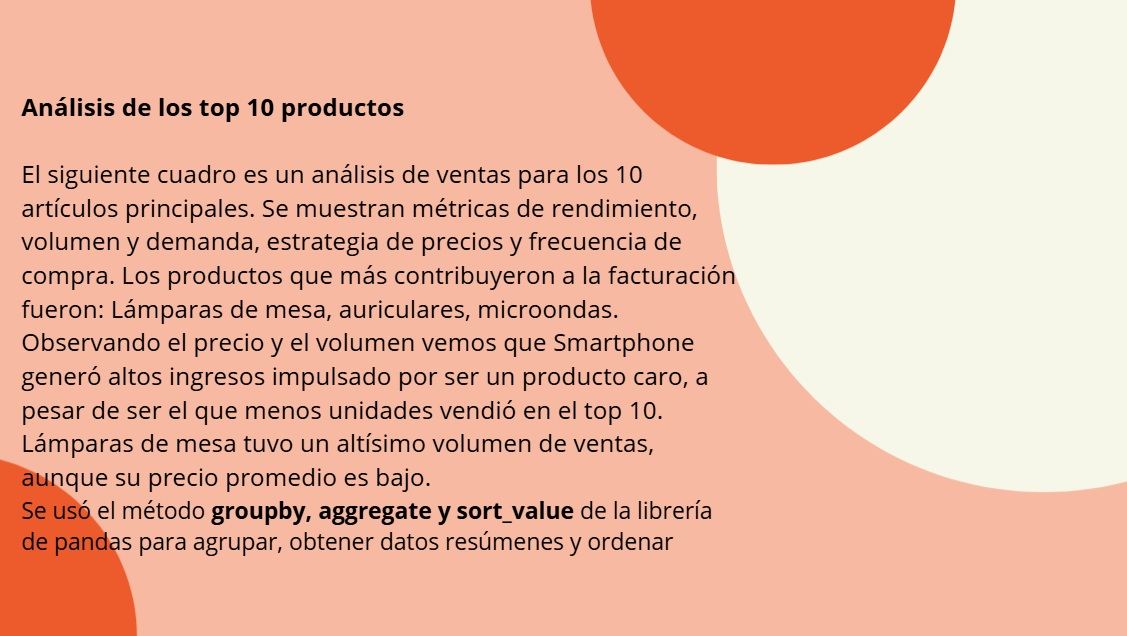

In [28]:
# Mostrar las 10 primeras filas de las métricas halladas
print(resumen_prod.head(10))

            producto  ingreso_total  unidades  precio_promedio  registros
0    Lámpara De Mesa      82,276.38  1,112.00            72.72        176
1        Auriculares      74,175.58    958.00            76.30        143
2         Microondas      72,562.89    912.00            79.18        135
3           Cafetera      59,607.31    765.00            79.05        117
4  Cuadro Decorativo      54,297.60    726.00            74.58        100
5         Smartphone      54,132.44    665.00            81.40        101
6           Secadora      52,115.45    696.00            73.34        100
7  Jarrón Decorativo      51,130.88    672.00            74.53        100
8           Batidora      50,979.20    672.00            77.54        100
9  Rincón De Plantas      50,456.45    691.00            74.82        101


In [29]:
# Calcular percentil 80 de ingreso_total
# --------------------------------------------------------
# La función quantile() nos permite obtener el valor de un percentil.
# En este caso, queremos saber el "ingreso" que separa al 80% de los productos
# con menores ingresos del 20% con mayores ingresos.

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,
    interpolation="linear"
)

# Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
ventas_top = (
    resumen_prod
    .query(
        "ingreso_total >= @p80_ingreso",
        engine="python"
    )
    .sort_values(
        by=["ingreso_total", "unidades"],
        ascending=[False, False],
        na_position="last",
        ignore_index=True
    )
)



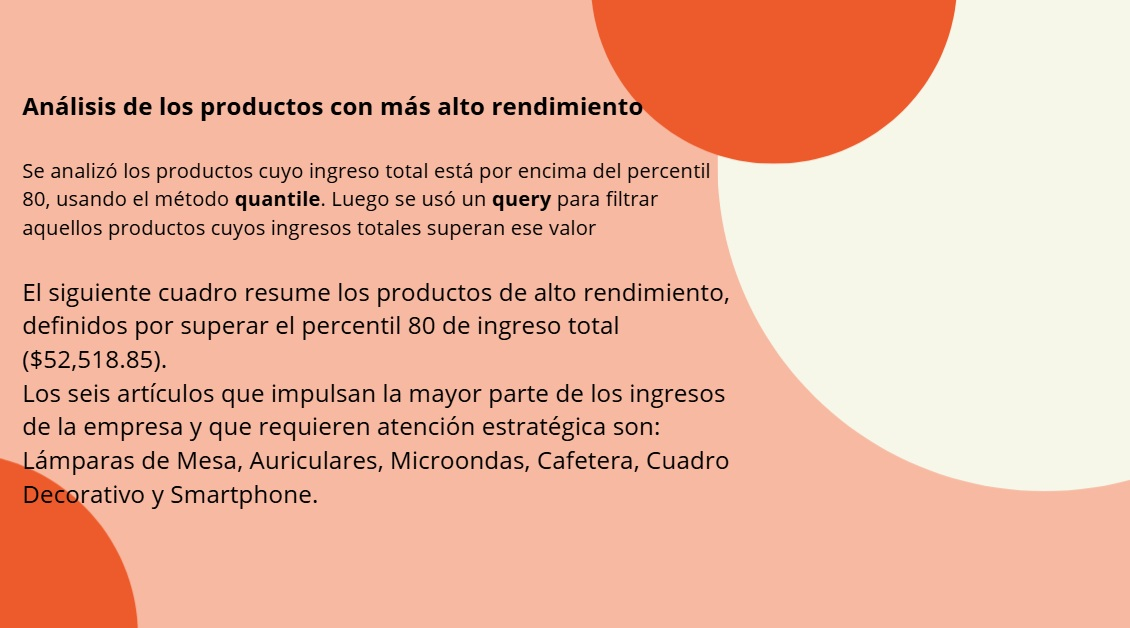

In [30]:
# Mostrar resultados
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))

Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,Lámpara De Mesa,"82,276.38","1,112.00",72.72,176
1,Auriculares,"74,175.58",958.00,76.30,143
2,Microondas,"72,562.89",912.00,79.18,135
3,Cafetera,"59,607.31",765.00,79.05,117
4,Cuadro Decorativo,"54,297.60",726.00,74.58,100
5,Smartphone,"54,132.44",665.00,81.40,101


#ETAPA 2: 3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [31]:
# Detectar columna de categoría reutilizando la función find_col
cat_col = find_col(df_ventas_clean, ["categoria", "categoría", "categoria_producto", "rubro"])
if cat_col is None:
    raise ValueError("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")

# Asegurar columna 'ingreso' (si no existe, crearla)
if "ingreso" not in df_ventas_clean.columns:
    df_ventas_cat = df_ventas_clean.assign(ingreso = df_ventas_clean["precio"] * df_ventas_clean["cantidad"])
else:
    df_ventas_cat = df_ventas_clean.copy()

In [32]:
# Obtener métricas por categoría: se agrupa por categoría y se obtienen resúmenes de ingresos, unidades vendidas, ventas y precio_promedio. Se ordena por ingreso en forma descendente
resumen_cat = (
    df_ventas_cat
    .groupby(
        by=cat_col,
        dropna=False,
        as_index=False
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),
        unidades=('cantidad', 'sum'),
        ventas=('ingreso', 'size'),
        precio_promedio=('precio', 'mean')
    )
    .sort_values(
        by='ingreso_total',
        ascending=False,
        na_position='last',
        ignore_index=True
    )
)

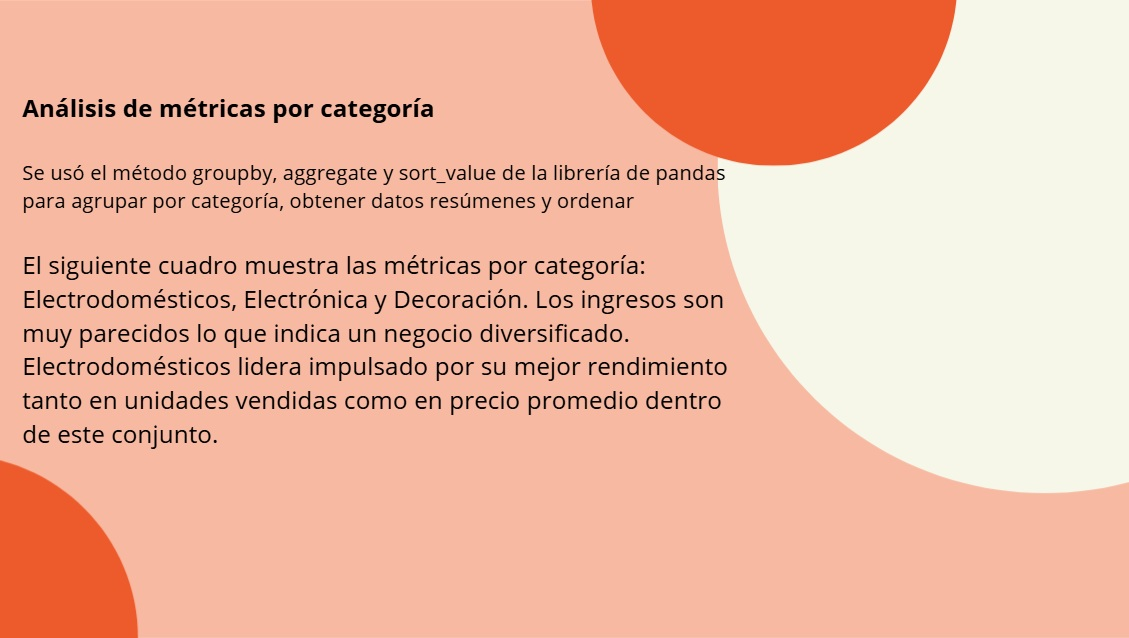

In [33]:
print("Columna de categoría detectada:", cat_col)
print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(5))

Columna de categoría detectada: categoria
Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio
0,Electrodomésticos,"505,299.63","6,592.00",1000,76.52
1,Electrónica,"482,577.80","6,413.00",999,75.25
2,Decoración,"479,216.09","6,490.00",1001,74.10


# ETAPA 2: 4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [34]:
# Analizar los set de datos de ventas y marketing para detectar si mejoraron las ventas con el marketing del producto
# agrupo el df de ventas clean por producto y sum la cantidad por el precio
df_ventas_x_producto = df_ventas_clean.groupby('producto').agg(
    precio_por_cantidad=('precio', lambda x: (x * df_ventas_clean.loc[x.index, 'cantidad']).sum())
)

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# muestro resultado
display(df_ventas_x_producto)

,precio_por_cantidad
producto,
Adorno De Pared,"48,093.49"
Alfombra,"44,773.06"
Aspiradora,"50,085.86"
Auriculares,"74,175.58"
Batidora,"50,979.20"
Cafetera,"59,607.31"
Candelabro,"11,128.80"
Consola De Videojuegos,"46,174.41"
Cortinas,"44,865.03"


In [35]:
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto

df_marketing_x_producto = df_marketings_clean.groupby('producto')['costo'].sum().reset_index()
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
display(df_marketing_x_producto)

,producto,costo
0,Adorno De Pared,14.05
1,Alfombra,17.46
2,Aspiradora,16.46
3,Auriculares,15.24
4,Batidora,15.28
5,Cafetera,18.16
6,Candelabro,14.65
7,Consola De Videojuegos,12.77
8,Cortinas,17.36
9,Cuadro Decorativo,15.85


In [36]:
#Combinar el df agrupado por producto con el de marketing agrupado por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,precio_por_cantidad,costo
0,Adorno De Pared,"48,093.49",14.05
1,Alfombra,"44,773.06",17.46
2,Aspiradora,"50,085.86",16.46
3,Auriculares,"74,175.58",15.24
4,Batidora,"50,979.20",15.28
5,Cafetera,"59,607.31",18.16
6,Candelabro,"11,128.80",14.65
7,Consola De Videojuegos,"46,174.41",12.77
8,Cortinas,"44,865.03",17.36
9,Cuadro Decorativo,"54,297.60",15.85


In [37]:
#obtengo que % me representa el costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)
merged_df.describe()

,producto,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,Adorno De Pared,"48,093.49",14.05,0.03
1,Alfombra,"44,773.06",17.46,0.04
2,Aspiradora,"50,085.86",16.46,0.03
3,Auriculares,"74,175.58",15.24,0.02
4,Batidora,"50,979.20",15.28,0.03
5,Cafetera,"59,607.31",18.16,0.03
6,Candelabro,"11,128.80",14.65,0.13
7,Consola De Videojuegos,"46,174.41",12.77,0.03
8,Cortinas,"44,865.03",17.36,0.04
9,Cuadro Decorativo,"54,297.60",15.85,0.03


,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
count,30.00,30.00,30.00
mean,"48,903.12",14.79,0.03
std,"13,265.56",1.64,0.02
min,"11,128.80",11.85,0.02
25%,"45,601.92",13.42,0.03
50%,"48,140.24",14.62,0.03
75%,"51,092.96",15.91,0.03
max,"82,276.38",18.16,0.13


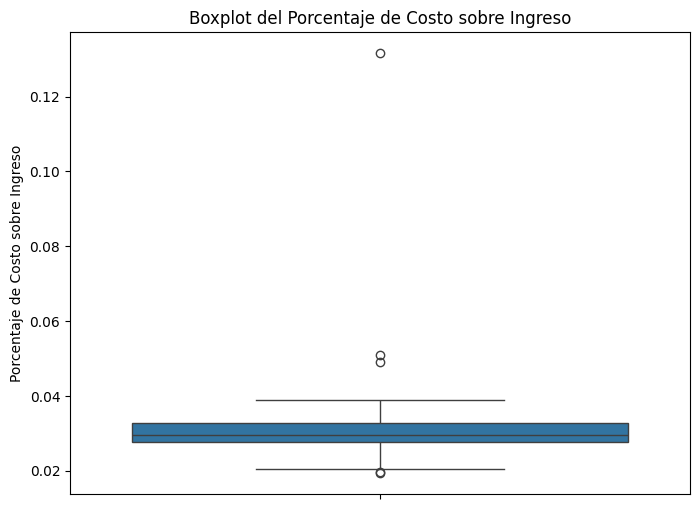

In [38]:
# Boxplot para visualizar dispersion and outliers potenciales
plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.show()

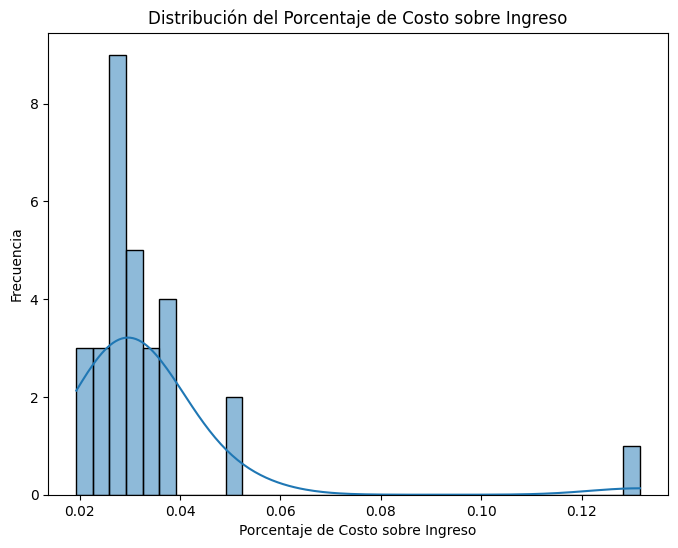

In [39]:
# Histograma para visualizar la distribución
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

📈 **Análisis de la Eficiencia del Gasto en Marketing (Ratio CM/IT)**
El análisis del **Ratio de Costo de Marketing sobre Ingreso Total (CM/IT)** revela una marcada disparidad en la eficiencia de las campañas:
*   **Rendimiento Excepcional (Outliers Superiores)**: **Productos clave como Lámpara de Mesa, Microondas y Auriculares** demuestran una **alta eficiencia**, ya que generan los ingresos más altos con un ratio CM/IT mínimo. Esto sugiere que sus campañas de marketing son altamente rentables y deben ser modelos a seguir.

*   **Zona de Vigilancia**: Productos como **Heladera, Tablet, Alfombra y Cortinas** presentan un ratio de **0.04 a 0.05**. Aunque conservan su rentabilidad, su costo de marketing es proporcionalmente mayor que el de los líderes, lo que exige una **revisión estratégica** para optimizar la inversión.

*   **Punto Crítico (Riesgo Máximo)**: El **Candelabro** con un ratio CM/IT de **0.13** (13%) es una señal de alerta, revelando una **rentabilidad insuficiente** y una alta probabilidad de **pérdidas directas** en cada campaña.

**Visualización Clave**: La distribución general, sesgada hacia la izquierda y con claros outliers en los extremos, subraya que la mayor parte de los productos tiene una eficiencia de marketing promedio o alta, pero el peso del bajo rendimiento del Candelabro y el éxito de los líderes distorsionan el panorama.

# ETAPA 3: 1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas

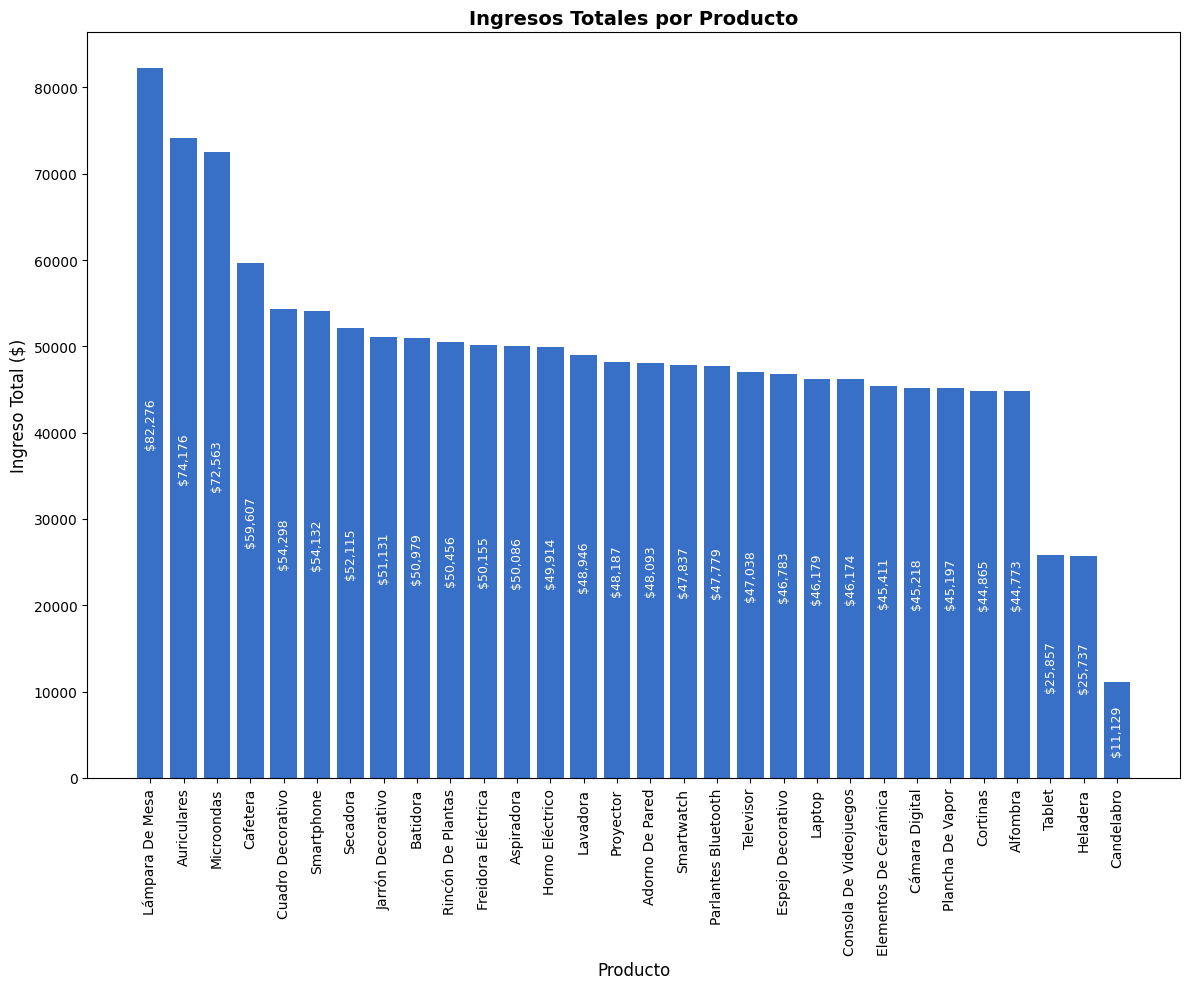

In [40]:
# Calcular medidas de tendencia central y dispersión sobre las ventas
df_resumen_prod = resumen_prod.copy()
df_prod_ordenado = df_resumen_prod.sort_values("ingreso_total", ascending=False)

# Crear la figura donde se va a dibujar el gráfico
plt.figure(figsize=(12, 10))

# Definir un color celeste para las barras
color_celeste = "#386FC7"

# Crear las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_celeste aplica el color definido arriba
barras = plt.bar(df_prod_ordenado["producto"], df_prod_ordenado["ingreso_total"], color=color_celeste)

# Agregar un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetar los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotar las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorrer cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtener la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribir el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,
        y / 2,
        f"${y:,.0f}",
        ha='center',
        va='center',
        fontsize=9,
        color="white",
        rotation=90
    )

# Ajustar automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostrar el gráfico final
plt.show()

### **Ingresos Totales por Producto: Disparidad y Ley de Pareto**
El gráfico confirma una **gran disparidad en los ingresos**, donde el producto líder (82,276) supera en casi siete veces al rezagado (11,129), confirmando el **Principio de Pareto**.
*   **Líderes de Venta**: Los tres productos principales (**Lámpara de Mesa, Auriculares, Microondas**) concentran la mayor parte de los ingresos, siendo los **motores del negocio**.
*   **Núcleo Estable**: El bloque de productos de ingresos medio-alto (e.g., Cafetera, Cuadro Decorativo) proporciona una **base sólida y consistente**.
*   **Puntos de Riesgo**: Los productos en el extremo derecho (**Heladera, Tablet**) y, especialmente, el **Candelabro** (11,129) requieren atención inmediata para mejorar su rentabilidad o evaluar su viabilidad."

## Graficos de resumen por categoría

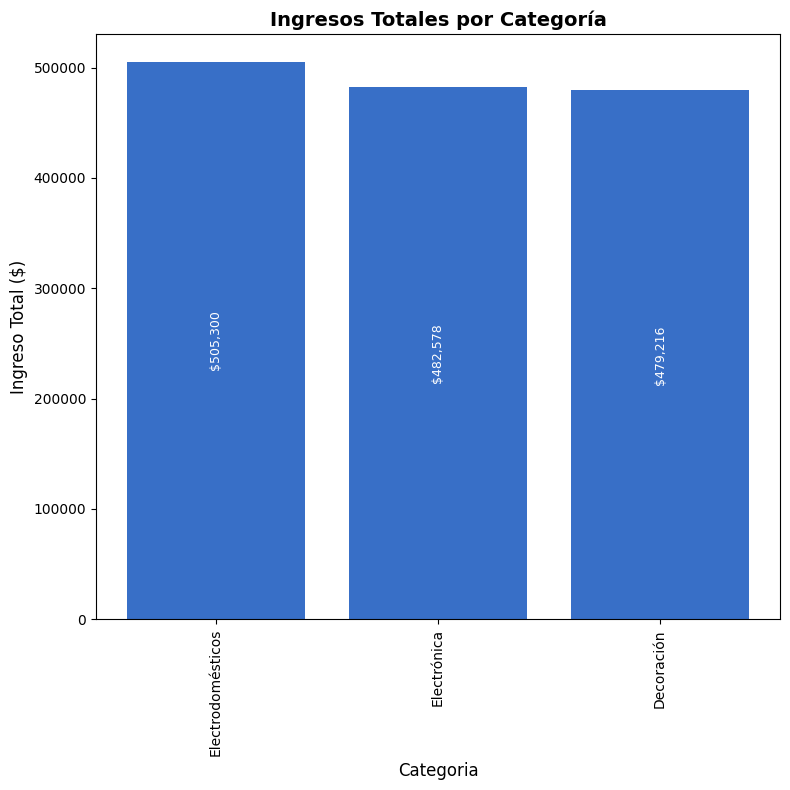

In [41]:
df_resumen_cat = resumen_cat.copy()
df_cat_ordenado = df_resumen_cat.sort_values("ingreso_total", ascending=False)
plt.figure(figsize=(8, 8))

barras = plt.bar(df_cat_ordenado["categoria"], df_cat_ordenado["ingreso_total"], color=color_celeste)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Categoría", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoria", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=90)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=9,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

Medidas de tendencia central y dispersión por categorías

In [42]:
media = df_resumen_cat['ingreso_total'].mean()
mediana = df_resumen_cat['ingreso_total'].median()
moda = df_resumen_cat['ingreso_total'].mode()

print("Media (Categorias):", media)
print("Mediana (Categorias):", mediana)
print("Moda (Categorias):")
print(moda)

rango = df_resumen_cat['ingreso_total'].max() - df_resumen_cat['ingreso_total'].min()
varianza = df_resumen_cat['ingreso_total'].var(ddof=1)
desviacion = df_resumen_cat['ingreso_total'].std(ddof=1)

print("Rango (Categorias):", rango)
print("Varianza (Categorias):", varianza)
print("Desviación estándar (Categorias):", desviacion)

Media (Categorias): 489031.17333333334
Mediana (Categorias): 482577.8
Moda (Categorias):
0   479,216.09
1   482,577.80
2   505,299.63
Name: ingreso_total, dtype: float64
Rango (Categorias): 26083.53999999998
Varianza (Categorias): 201322285.26743323
Desviación estándar (Categorias): 14188.808451291223


Medidas de tendencia central y dispersión por productos

In [43]:
media = df_resumen_prod['ingreso_total'].mean()
mediana = df_resumen_prod['ingreso_total'].median()
#moda = df_resumen_prod['ingreso_total'].mode()

print("Media (Productos):", media)
print("Mediana (Productos):", mediana)
#print("Moda (Productos):")
#print(moda)
# Desviación estándar
rango = df_resumen_prod['ingreso_total'].max() - df_resumen_prod['ingreso_total'].min()
varianza = df_resumen_prod['ingreso_total'].var(ddof=1)
desviacion = df_resumen_prod['ingreso_total'].std(ddof=1)

print("Rango (Productos):", rango)
print("Varianza (Productos):", varianza)
print("Desviación estándar (Productos):", desviacion)

Media (Productos): 48903.117333333335
Mediana (Productos): 48140.244999999995
Rango (Productos): 71147.58
Varianza (Productos): 175975127.62545472
Desviación estándar (Productos): 13265.56171541389


### 📊 **Análisis de Tendencia Central y Variabilidad de Ingresos por Producto**
**1. Tendencia Central: Simetría y Ausencia de Sesgo Extremo**
*   **Media y Mediana Consistentes**: La cercanía entre la Media ($48,903.12) y la Mediana ($48,140.24) es un indicador clave de que la distribución de los ingresos totales es **relativamente simétrica**.

*   **Implicación**: Esta proximidad sugiere que el conjunto de datos no está significativamente sesgado por un impacto masivo de valores extremos (outliers), lo que permite utilizar la Media como una representación confiable del rendimiento promedio.

**2. Variabilidad: Alta Dispersión y Heterogeneidad**
*   **Desviación Estándar Crítica**: La Desviación Estándar de **$13,265.56** es considerable, representando aproximadamente el **27% de la Media**. Este alto valor confirma una **dispersión significativa**; en promedio, el ingreso individual de los productos se desvía sustancialmente del ingreso promedio general.

*   **Rango Extremo**: El Rango ($71,147.58), que abarca desde el Mínimo ($11,128.80) hasta el Máximo ($82,276.38), **corrobora esta profunda variabilidad** en el portafolio de productos.

**3. Conclusión Estratégica Persuasiva**.

**La heterogeneidad en el desempeño es la conclusión más relevante**. A pesar de la simetría central, los datos confirman que los productos **no contribuyen a los ingresos de manera uniforme**.

*   **Acción**: Es prioritario enfocarse en la **identificación y potenciación** de los productos de alto rendimiento. En paralelo, los productos de bajo rendimiento deben ser **reevaluados** o considerados para campañas de marketing especializadas, dada la desviación sustancial de su rendimiento respecto al promedio del mercado.

## Cálculo del rango intercuartílico (IQR)

In [44]:
q1 = df_resumen_cat['ingreso_total'].quantile(0.25)
q2 = df_resumen_cat['ingreso_total'].quantile(0.5)
q3 = df_resumen_cat['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 480896.945
Mediana (Q2): 482577.8
Q3: 493938.71499999997
IQR: 13041.76999999996


# Detección de outliners usando el IQR

In [45]:
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df_resumen_cat[(df_resumen_cat['ingreso_total'] < lim_inf) | (df_resumen_cat['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 461334.29000000004
Límite superior: 513501.3699999999

Outliers detectados:
Empty DataFrame
Columns: [categoria, ingreso_total, unidades, ventas, precio_promedio]
Index: []


In [46]:
# Calculo del IQR (productos)
q1 = df_resumen_prod['ingreso_total'].quantile(0.25)
q2 = df_resumen_prod['ingreso_total'].quantile(0.5)
q3 = df_resumen_prod['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print("Q1:", q1)
print("Mediana (Q2):", q2)
print("Q3:", q3)
print("IQR:", iqr)

Q1: 45601.92
Mediana (Q2): 48140.244999999995
Q3: 51092.96
IQR: 5491.040000000001


In [47]:
#Detección de outliners (productos) usando IQR
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df_resumen_prod[(df_resumen_prod['ingreso_total'] < lim_inf) | (df_resumen_prod['ingreso_total'] > lim_sup)]

print("Límite inferior:", lim_inf)
print("Límite superior:", lim_sup)
print("\nOutliers detectados:")
print(outliers)

Límite inferior: 37365.36
Límite superior: 59329.520000000004

Outliers detectados:
           producto  ingreso_total  unidades  precio_promedio  registros
0   Lámpara De Mesa      82,276.38  1,112.00            72.72        176
1       Auriculares      74,175.58    958.00            76.30        143
2        Microondas      72,562.89    912.00            79.18        135
3          Cafetera      59,607.31    765.00            79.05        117
27           Tablet      25,856.57    374.00            71.38         58
28         Heladera      25,736.80    330.00            74.13         48
29       Candelabro      11,128.80    160.00            74.60         24


### **📦 Análisis del IQR y Outliers: Enfoque en Consistencia y Riesgo**
**1. Consistencia del Núcleo de Productos**

**El Rango Intercuartílico (IQR) de $5,491.04** indica una **fuerte consistencia** en el rendimiento del 50% central del portafolio, con ingresos agrupados entre **$45,602 (Q1) y $51,093 (Q3)**. La mayoría de los productos opera en un rango muy estable.

**2. Identificación de Outliers Estratégicos**

🚀 **Outliers Altos**: Productos como **Lámpara de Mesa** ($82,276) y **Auriculares** ($74,175) son los **motores de ingreso** del negocio, superando significativamente el Límite Superior ($59,329).

⚠️ **Outliers Bajos**: **Tablet** ($25,856), **Heladera** ($25,736), y el crítico **Candelabro** ($11,128) caen por debajo del Límite Inferior ($37,365). Estos representan **riesgos y pérdidas potenciales**.

**Llamada a la Acción**: La prioridad es la **reevaluación inmediata** de los outliers bajos, especialmente el Candelabro. Es crucial determinar si requieren una reestructuración de precios o una **posible descontinuación** para liberar recursos hacia las categorías de mayor rendimiento.

# ETAPA 3: 2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas

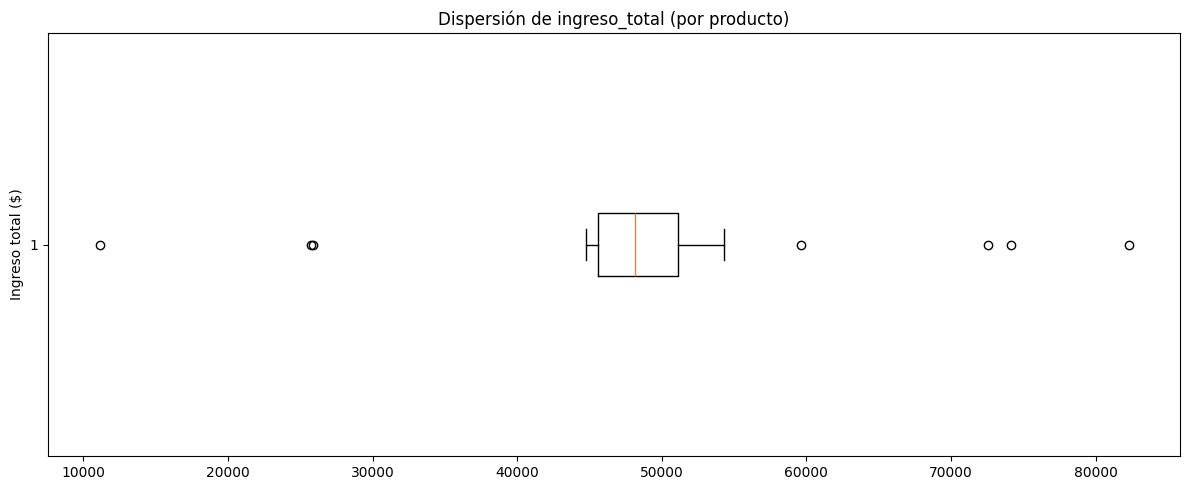

In [48]:
vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso_total (por producto)')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico

### **📊 Interpretación del Boxplot (Dispersión de Ingresos)**
**1. Consistencia Operacional**

El gráfico revela que el **50% central** de los productos mantiene un **rendimiento altamente consistente**, agrupándose en un rango estrecho (aproximadamente entre $45,000 y $51,000). Esto establece una **base de ingresos estable** para el negocio.

**2. Identificación de Extremos Clave**

Los outliers confirman una fuerte dicotomía que impulsa la estrategia:
*   🚀 **Productos Estrella (Outliers Superiores)**: Tres productos (**Lámpara de Mesa, Auriculares, Microondas**) generan ingresos excepcionalmente altos (entre 72,000 y 82,000). Estos son los **principales motores de crecimiento** y deben ser el foco de atención estratégica para sostener su éxito.
*   ⚠️ **Productos Rezagados (Outliers Inferiores)**: Tres productos (**Candelabro** $\approx \$11,000$, **Heladera** y **Tablet** $\approx \$25,000$) están significativamente rezagados. Su ingreso anormalmente bajo exige una **evaluación inmediata** de su viabilidad y estrategia comercial.

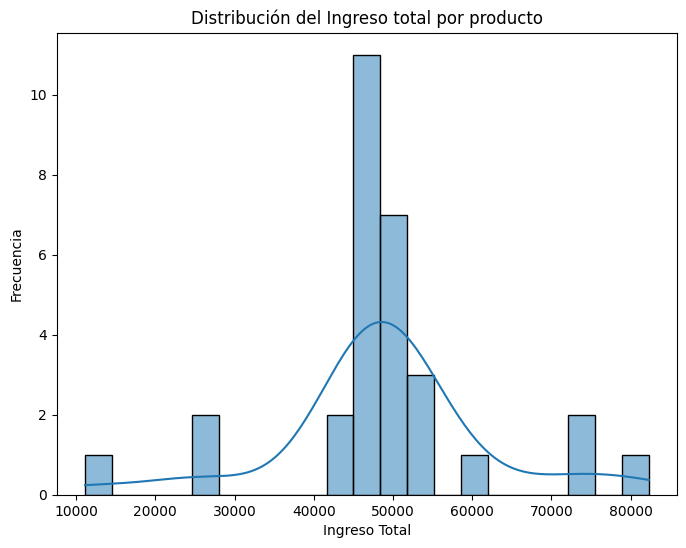

In [49]:
# Mostrar distribución en un histograma
plt.figure(figsize=(8, 6))
sns.histplot(vals, kde=True)
plt.title('Distribución del Ingreso total por producto')
plt.xlabel('Ingreso Total')
plt.ylabel('Frecuencia')
plt.show()

### **📊 Interpretación del Histograma (Forma y Frecuencia)**
El histograma confirma la estructura de la distribución de ingresos, destacando una **alta concentración central** y una **variabilidad significativa** en los extremos.

**1. Núcleo de la Distribución (Moda)**
*   **Moda Principal**: El pico más alto se ubica claramente en el rango de **47,500 a 52,500**.
*   **Implicación**: Esto demuestra una **consistencia operativa** dominante, donde la mayoría del catálogo (11 de 30 productos) se agrupa fuertemente alrededor de la marca de los 50,000, generando un rendimiento de ingresos similar.

**2. Identificación de Dispersión y Outliers**
La distribución **no se ajusta a una curva normal**, presentando barras aisladas que confirman la presencia de outliers estratégicos:
*   🚀 **Productos Estrella**: Tres barras aisladas en el extremo derecho (rangos $\approx \$72,500 - \$82,500$) confirman visualmente los **productos de alto ingreso** que impulsan el crecimiento.
*   ⚠️ **Productos Rezagados**: Tres barras aisladas en el extremo izquierdo (rangos $\approx \$10,000 - \$30,000$) confirman los **productos de bajo rendimiento** que requieren una intervención inmediata.

# Etapa 3: 3. Correlación

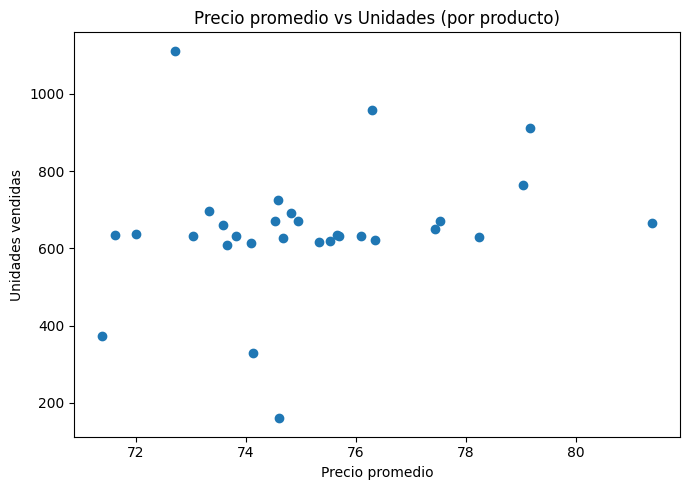

In [50]:
x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
plt.scatter(x, y)                    # gráfico de puntos
plt.title('Precio promedio vs Unidades (por producto)')  # título
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()                           # mostrar


### **Interpretacion de la Correlación Precio vs Volumen**
El gráfico muestra una **correlación positiva débil** ($r \approx 0.22$) entre el precio promedio y las unidades vendidas, lo cual es inusual.
*   **Productos de Alto Volumen**: Se identifican dos puntos clave: un producto líder en volumen (más de 1,100 unidades a $\approx \$73$) y un producto exitoso que combina un alto volumen (cerca de 900 unidades) con un precio relativamente alto ($\approx \$79.5$). Estos indican dónde **el precio y la demanda convergen exitosamente**.
*   **Productos de Bajo Rendimiento**: Múltiples puntos en la parte inferior del gráfico, incluido un producto con bajo volumen (aproximadamente 150 unidades) y precio promedio ($\approx \$74.5$), confirman la existencia de productos con **baja tracción en el mercado**, independientemente de su precio.

In [51]:
#No hay una función para trazar la curva de correlación?
# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.8:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.8:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.3:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")


Coeficiente de correlación (Pearson): 0.217
Interpretación: relación positiva débil a moderada.


 La correlación positiva **0,217** implica que productos con precios ligeramente más altos tienden a vender más unidades, podría deberse a una percepción de **mayor calidad**.

# 4.1 Visualización con Matplotlib (básica)

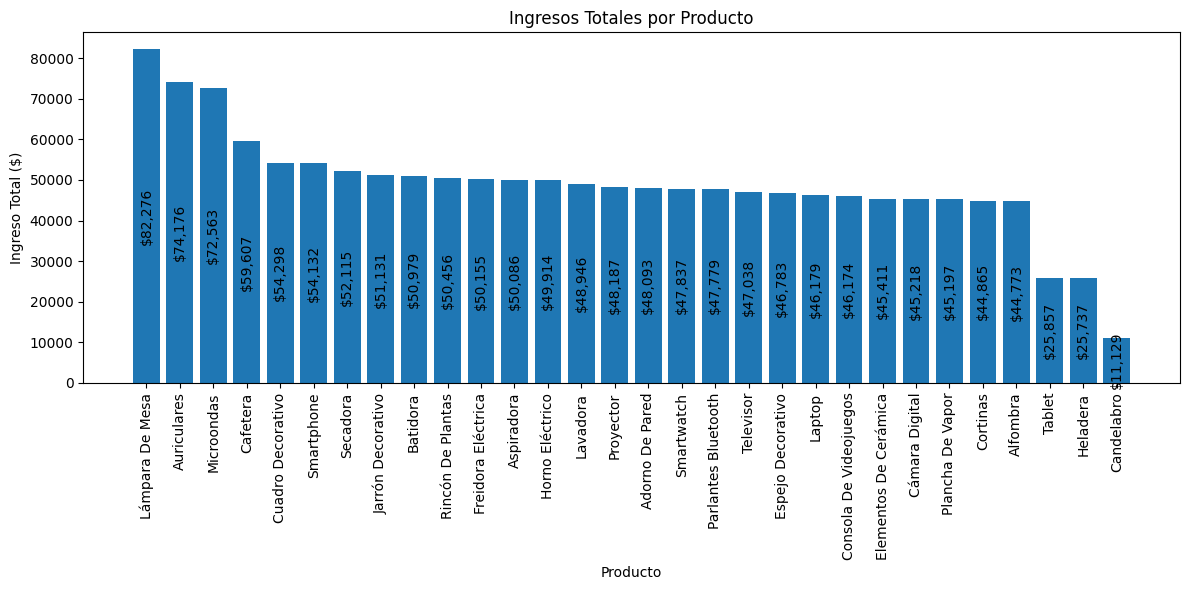

In [52]:
df = resumen_prod.copy()                                # copiamos para no modificar el original
df_ordenado = df.sort_values('ingreso_total', ascending=False)  # ordenamos desc por ingreso

plt.figure(figsize=(12, 6))                             # tamaño del gráfico
barras = plt.bar(df_ordenado['producto'], df_ordenado['ingreso_total'])  # dibujamos las barras

plt.title('Ingresos Totales por Producto')              # título del gráfico
plt.xlabel('Producto')                                  # etiqueta eje X
plt.ylabel('Ingreso Total ($)')                         # etiqueta eje Y
plt.xticks(rotation=90)                                  # rotamos etiquetas del eje X para legibilidad

# Etiquetamos el valor dentro de cada barra (texto vertical)
for b in barras:
    h = b.get_height()                                  # altura de la barra (valor)
    x_c = b.get_x() + b.get_width()/2                   # centro horizontal de la barra
    plt.text(x_c, h/2, f"${h:,.0f}", ha='center', va='center', rotation=90)  # texto dentro, vertical

plt.tight_layout()                                      # ajustar márgenes
plt.show()                                              # mostrar gráfico


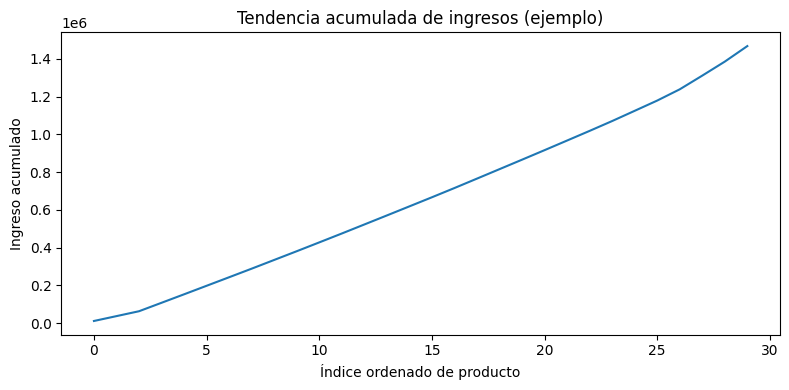

In [53]:
# =========================================
# 📉 Líneas: ejemplo simple de tendencia acumulada
# =========================================

valores = resumen_prod['ingreso_total'].sort_values().values  # tomamos ingresos ordenados
acum = np.cumsum(valores)                                     # acumulado simple (ejemplo)

plt.figure(figsize=(8, 4))   # tamaño del gráfico
plt.plot(acum)               # línea simple
plt.title('Tendencia acumulada de ingresos (ejemplo)')
plt.xlabel('Índice ordenado de producto')
plt.ylabel('Ingreso acumulado')
plt.tight_layout()
plt.show()


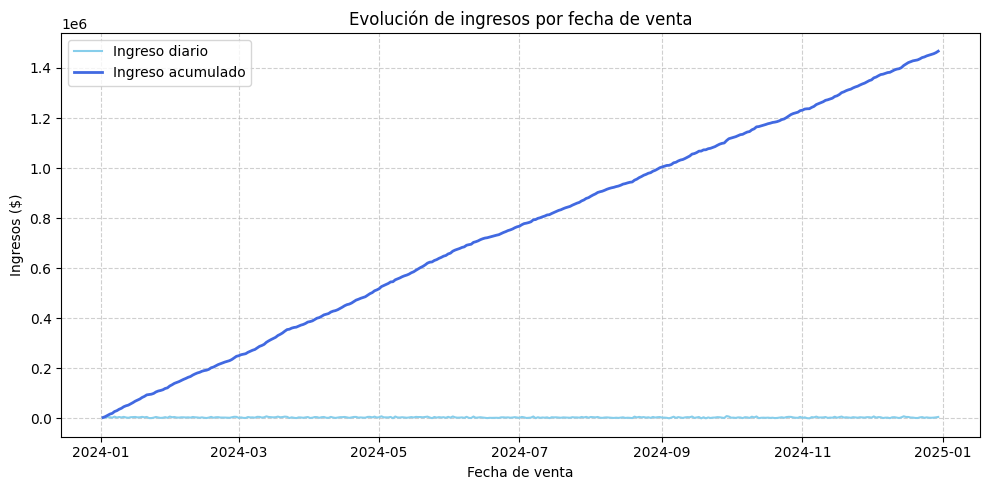

In [54]:
# =========================================
# 📉 Tendencia real de ingresos a lo largo del tiempo
# =========================================
# Usamos el dataset 'ventas_perf', que contiene la fecha y el ingreso de cada registro.

# Convertimos la columna 'fecha_venta' a tipo datetime (por seguridad)
df_ventas_perf['fecha_venta'] = pd.to_datetime(df_ventas_perf['fecha_venta'], errors='coerce')

# Agrupamos las ventas por fecha y sumamos los ingresos de cada día
ingresos_por_dia = df_ventas_perf.groupby('fecha_venta')['ingreso'].sum().sort_index()

# Calculamos el acumulado de ingresos
ingresos_acumulados = ingresos_por_dia.cumsum()

# Graficamos ambas curvas: ingresos diarios y acumulados
plt.figure(figsize=(10, 5))

# Línea 1: ingresos diarios
plt.plot(ingresos_por_dia, color='skyblue', label='Ingreso diario')

# Línea 2: ingresos acumulados
plt.plot(ingresos_acumulados, color='royalblue', label='Ingreso acumulado', linewidth=2)

# Personalización del gráfico
plt.title('Evolución de ingresos por fecha de venta')
plt.xlabel('Fecha de venta')
plt.ylabel('Ingresos ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🧠 Interpretación:
# - La línea celeste muestra los ingresos de cada día.
# - La línea azul muestra el crecimiento acumulado total.
# Si la curva acumulada es ascendente constante → ventas estables.
# Si aparecen saltos abruptos → picos de venta (promociones o campañas de marketing).


# Etapa 4.2 Visualizacion avanzada con Seaborn

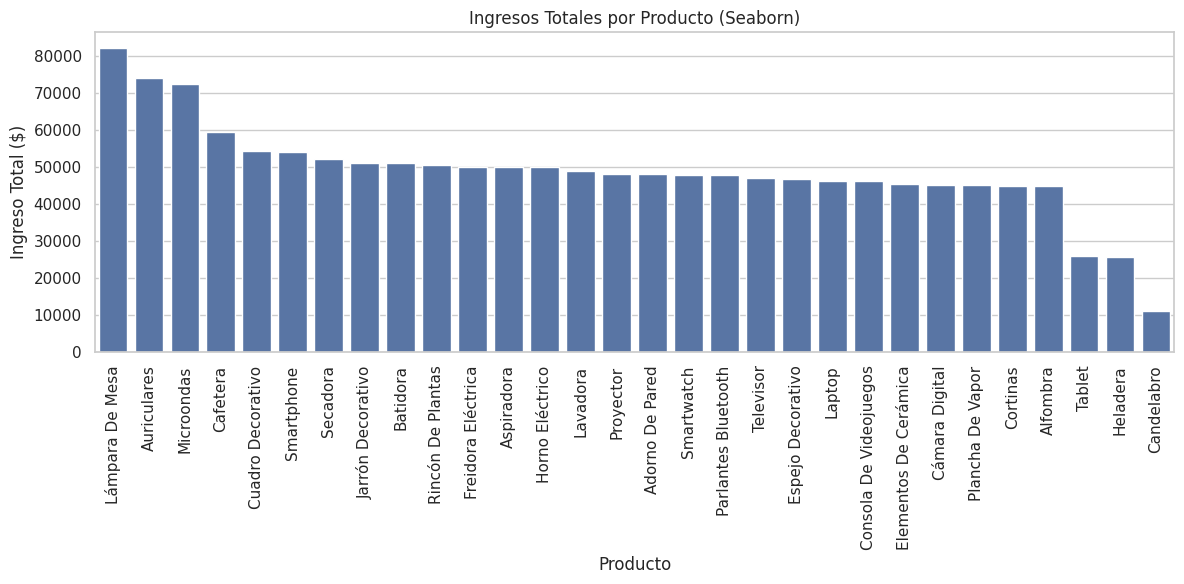

In [55]:
sns.set_theme(style="whitegrid")      # estilo claro por defecto

# Barras ordenadas (Seaborn)
df = resumen_prod.sort_values('ingreso_total', ascending=False)  # ordenamos
plt.figure(figsize=(12, 6))                                      # tamaño
ax = sns.barplot(data=df, x='producto', y='ingreso_total')       # barras
ax.set_title('Ingresos Totales por Producto (Seaborn)')          # título
ax.set_xlabel('Producto'); ax.set_ylabel('Ingreso Total ($)')    # etiquetas
plt.xticks(rotation=90)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar


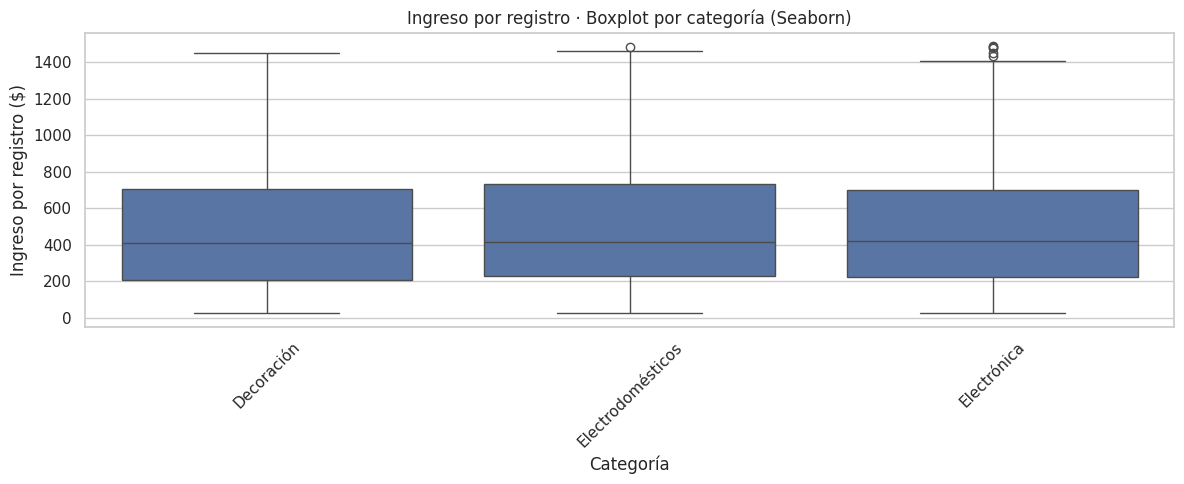

In [56]:
# Boxplot por categoría (ingreso por registro)
plt.figure(figsize=(12, 5))                                      # tamaño
ax = sns.boxplot(data=df_ventas_perf, x='categoria', y='ingreso')   # boxplot
ax.set_title('Ingreso por registro · Boxplot por categoría (Seaborn)')  # título
ax.set_xlabel('Categoría'); ax.set_ylabel('Ingreso por registro ($)')   # etiquetas
plt.xticks(rotation=45)                                          # rotamos etiquetas
plt.tight_layout(); plt.show()                                   # mostrar


# Presentacion Final

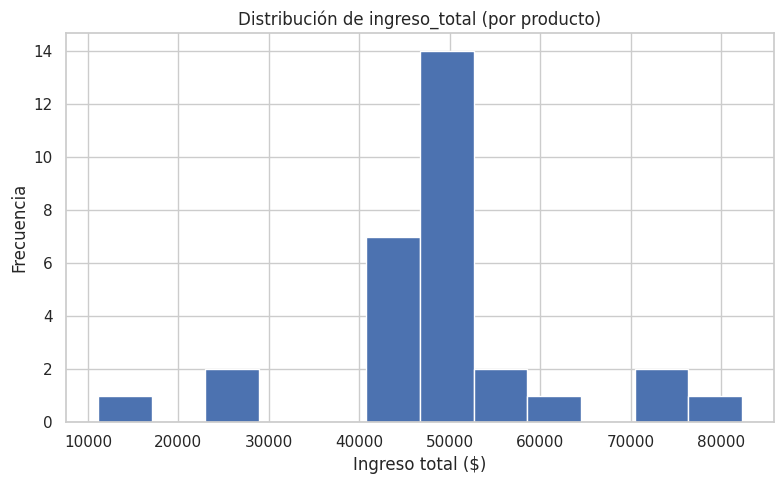

In [57]:

# =========================================
# 📈 Histograma: distribución de ingreso_total (por producto)
# =========================================

import matplotlib.pyplot as plt  # importamos la librería de gráficos

serie = resumen_prod['ingreso_total']        # elegimos la serie numérica a analizar

plt.figure(figsize=(8, 5))                   # definimos tamaño del gráfico
plt.hist(serie, bins=12)                     # dibujamos histograma con 12 intervalos
plt.title('Distribución de ingreso_total (por producto)')  # título del gráfico
plt.xlabel('Ingreso total ($)')              # etiqueta del eje X
plt.ylabel('Frecuencia')                     # etiqueta del eje Y
plt.tight_layout()                           # ajustamos márgenes para que no se corte el contenido
plt.show()                                   # mostramos el gráfico


### **Conclusión final**
🚀 **Resumen Estratégico y Llamada a la Acción**
La estructura de ingresos del negocio presenta una dicotomía clara: una base sólida de productos con rendimientos promedio, y un pequeño grupo de productos en los extremos que definen el éxito financiero.

🌟 **Capitalizar la Eficiencia**
*   **Productos Estrella**: **La Lámpara de Mesa** y los **Auriculares** texto en negrita(Ingreso
$74k - $82k) son motores de crecimiento. Su eficiencia de marketing (Ratio CM/IT $\approx 0.02$) es óptima.
*   **Acción: Priorizar Stock e Inversión** en campañas de retargeting para estos productos, replicando su modelo de éxito.

🚨 **Riesgo y Reevaluación Urgente**
*   **Pérdida Directa**: El **Candelabro** (Ingreso $11k) presenta un ratio costo de marketing/ingreso total de **0.13**, indicando que las campañas de marketing resultan en **pérdidas directas**.
*   **Acción: Reevaluar la viabilidad** y, de ser necesario, proceder con la **descontinuación** para liberar recursos de marketing y operativos.

💡 **Estrategia de Precios**

La correlación positiva débil entre Precio y Unidades sugiere que la demanda no es altamente sensible al precio en el rango actual. Se recomienda explorar un **aumento estratégico de precios** en los productos del núcleo central para incrementar los márgenes sin sacrificar volumen.

Desmontar la unidad

In [58]:
# Liberar la unidad
drive.flush_and_unmount()